In [136]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import ipywidgets as widgets
from ipywidgets import interact

import numpy as np


from scipy.interpolate import interp1d
from dtaidistance import dtw
from scipy.stats import pearsonr

from scipy import spatial
import itertools


In [29]:
df = pd.read_csv("00.imdb_top_250_series_episode_ratings.csv")
# df.drop(columns=["Unnamed: 0"], inplace=True)

df.head()

,Season,Episode,Rating,Code,Title
0,1,1,9.4,tt5491994,Planet Earth II
1,1,2,9.1,tt5491994,Planet Earth II
2,1,3,8.9,tt5491994,Planet Earth II
3,1,4,8.8,tt5491994,Planet Earth II
4,1,5,8.6,tt5491994,Planet Earth II


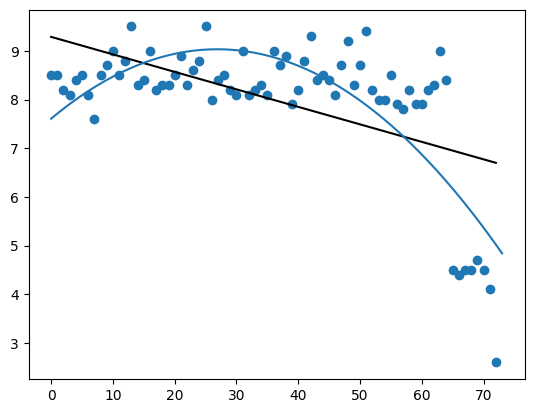

-0.03591879550783661
           2
-0.001971 x + 0.106 x + 7.607


In [230]:


#Example data
x = [0,1,2,3,4]
y = [1,2,5,8,1]

x = np.array(x)
y = np.array(y)

y = df.loc[df['Title']=="House of Cards"].sort_values(by=['Season', 'Episode']).reset_index(drop=True).Rating.values
x = np.arange(0,len(y))


#Fit line
slope, intercept = np.polyfit(x, y, 1)

#Plot
plt.figure()
plt.scatter(x, y) 
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color = 'k')

model = np.poly1d(np.polyfit(x, y, 2)) 
polyline = np.linspace(0, len(x), 100) 
plt.plot(polyline, model(polyline)) 

plt.show()

print(slope)
print(model)

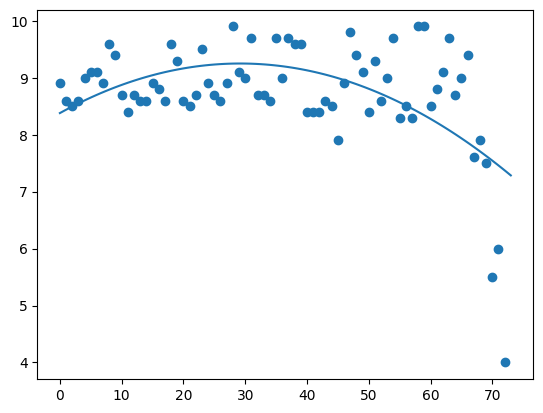

           2
-0.001023 x + 0.05967 x + 8.379


In [220]:
# degree 2 polynomial fit or quadratic fit 
model = np.poly1d(np.polyfit(x, y, 2)) 
  
# polynomial line visualization 
polyline = np.linspace(0, len(x), 100) 
plt.scatter(x, y) 
plt.plot(polyline, model(polyline)) 
plt.show() 
  
print(model) 

In [219]:
np.linspace(0, 60, 10) 

array([ 0.        ,  6.66666667, 13.33333333, 20.        , 26.66666667,
       33.33333333, 40.        , 46.66666667, 53.33333333, 60.        ])

In [216]:

#polynomial fit with degree = 2
model = np.poly1d(np.polyfit(hours, happ, 2))

#add fitted polynomial line to scatterplot
polyline = np.linspace(1, 60, 50)
plt.scatter(hours, happ)
plt.plot(polyline, model(polyline))
plt.show()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72])

In [224]:
# Dexter
-0.0003389 x + 0.0224 x + 8.441

# Game of Thrones
-0.001023 x + 0.05967 x + 8.379

# House of Cards
-0.001971 x + 0.106 x + 7.607

# Breaking Bad
0.0004942 x - 0.01431 x + 8.775

# Better Call Saul
0.0003404 x - 0.009442 x + 8.667




poly1d([-3.38906747e-04,  2.23962223e-02,  8.44129826e+00])

In [121]:
def heatmap_tv_series(series_name):

    tv = df.loc[(df['Title']==series_name)].copy()
    tv_pivot = tv.pivot(index='Season', 
                           columns='Episode',
                          values='Rating')
    
    fig, ax = plt.subplots(1,1, figsize=(20, 7))
    sns.heatmap(tv_pivot, 
                annot=True, 
                cbar=False,
                cmap="RdYlGn",
               center=7,
               linewidths=0.07,
               square=False)    
    plt.show()
    

dropdown_list_order = df.Title.sort_values().unique().tolist()
n_widget = widgets.Dropdown(options=df.Title.sort_values().unique().tolist(), value='Top Gear', description='TV Series')

widgets.interact(heatmap_tv_series, series_name=n_widget);

interactive(children=(Dropdown(description='TV Series', index=225, options=('1883', 'Adventure Time', 'Africa'…

In [95]:
time_series_b = df.loc[df['Title']=='Top Gear'].sort_values(by=['Season', 'Episode']).reset_index(drop=True).Rating.values
time_series_a = df.loc[df['Title']=="House of Cards"].sort_values(by=['Season', 'Episode']).reset_index(drop=True).Rating.values


In [96]:
distance, paths = dtw.warping_paths(time_series_a, time_series_b, use_c=False)
best_path = dtw.best_path(paths)
similarity_score = distance / len(best_path)

In [97]:
similarity_score

np.float64(0.04516951488382494)

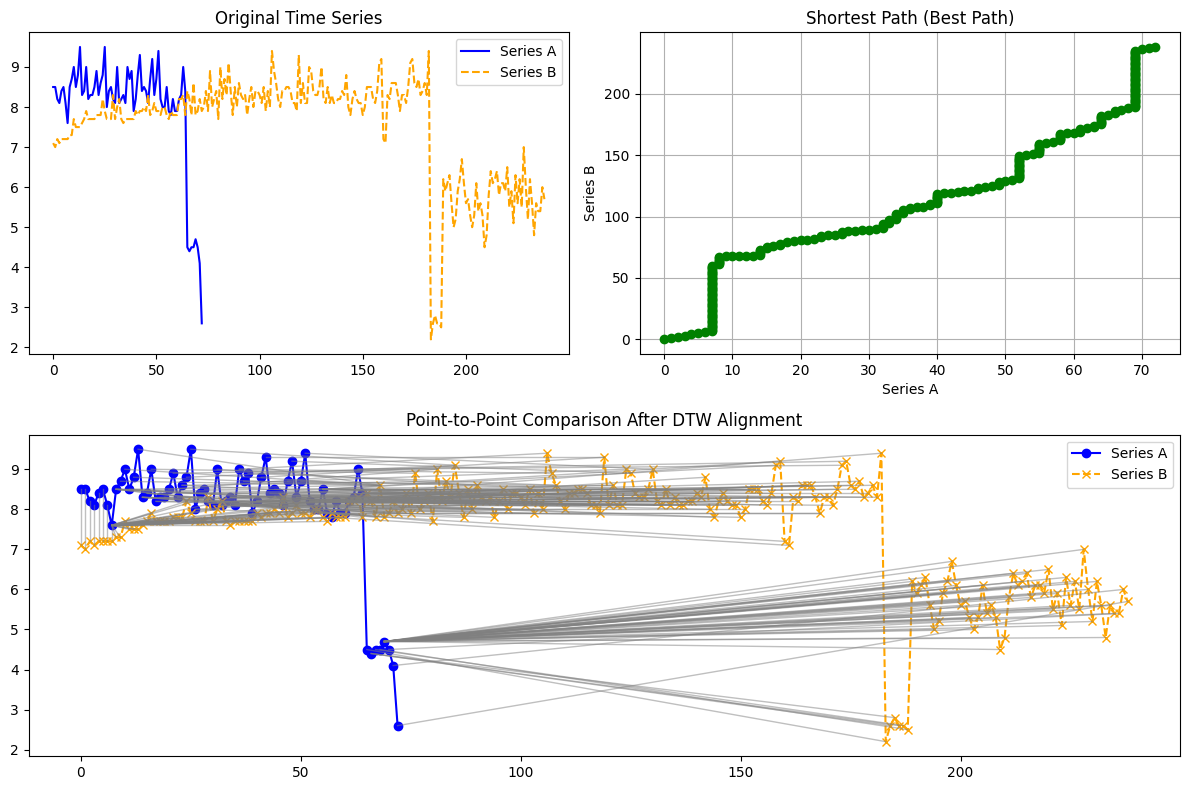

In [98]:
plt.figure(figsize=(12, 8))

# Original Time Series Plot
ax1 = plt.subplot2grid((2, 2), (0, 0))
ax1.plot(time_series_a, label='Series A', color='blue')
ax1.plot(time_series_b, label='Series B', linestyle='--',color='orange')
ax1.set_title('Original Time Series')
ax1.legend()

# Shortest Path Plot (Cost Matrix with the path)
# In this example, only the path is plotted, not the entire cost matrix.

ax2 = plt.subplot2grid((2, 2), (0, 1))
ax2.plot(np.array(best_path)[:, 0], np.array(best_path)[:, 1], 'green', marker='o', linestyle='-')
ax2.set_title('Shortest Path (Best Path)')
ax2.set_xlabel('Series A')
ax2.set_ylabel('Series B')
ax2.grid(True)

# Point-to-Point Comparison Plot
ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=2)
ax3.plot(time_series_a, label='Series A', color='blue', marker='o')
ax3.plot(time_series_b, label='Series B', color='orange', marker='x', linestyle='--')
for a, b in best_path:
    ax3.plot([a, b], [time_series_a[a], time_series_b[b]], color='grey', linestyle='-', linewidth=1, alpha = 0.5)
ax3.set_title('Point-to-Point Comparison After DTW Alignment')
ax3.legend()

plt.tight_layout()
plt.show()

In [99]:
spatial.distance.cosine(time_series_a, time_series_b)


ValueError: shapes (73,) and (239,) not aligned: 73 (dim 0) != 239 (dim 0)

In [100]:
from scipy import interpolate

In [101]:
time_series_a.shape, time_series_b.shape

((73,), (239,))

In [107]:
f = interpolate.interp1d(np.arange(0, len(time_series_a)), time_series_a)
my_stretched_a = f(np.linspace(0.0, len(time_series_a)-1, len(time_series_b)))
my_stretched_a.shape

(239,)

In [103]:
time_series_a

array([8.5, 8.5, 8.2, 8.1, 8.4, 8.5, 8.1, 7.6, 8.5, 8.7, 9. , 8.5, 8.8,
       9.5, 8.3, 8.4, 9. , 8.2, 8.3, 8.3, 8.5, 8.9, 8.3, 8.6, 8.8, 9.5,
       8. , 8.4, 8.5, 8.2, 8.1, 9. , 8.1, 8.2, 8.3, 8.1, 9. , 8.7, 8.9,
       7.9, 8.2, 8.8, 9.3, 8.4, 8.5, 8.4, 8.1, 8.7, 9.2, 8.3, 8.7, 9.4,
       8.2, 8. , 8. , 8.5, 7.9, 7.8, 8.2, 7.9, 7.9, 8.2, 8.3, 9. , 8.4,
       4.5, 4.4, 4.5, 4.5, 4.7, 4.5, 4.1, 2.6])

In [104]:
time_series_b

array([7.1, 7. , 7.2, 7.1, 7.2, 7.2, 7.2, 7.2, 7.3, 7.3, 7.7, 7.5, 7.5,
       7.5, 7.6, 7.7, 7.9, 7.7, 7.7, 7.7, 7.7, 7.8, 7.8, 7.8, 8.2, 7.9,
       7.7, 7.7, 7.7, 8.3, 7.7, 8. , 8.2, 7.7, 7.6, 7.7, 7.7, 7.7, 7.7,
       7.7, 7.9, 7.8, 7.9, 7.9, 8. , 7.9, 8.3, 7.8, 7.9, 8.1, 7.9, 7.9,
       7.8, 8. , 8. , 7.8, 7.7, 7.9, 7.8, 7.8, 7.8, 8.2, 8.2, 8.3, 7.8,
       8.4, 8.2, 7.8, 8.6, 7.8, 7.9, 8.2, 7.9, 8. , 8.4, 7.9, 8.9, 8. ,
       8.2, 8.4, 7.7, 9. , 8.2, 8.7, 8.3, 9.1, 8.4, 7.8, 8.5, 8. , 8.6,
       8.3, 8.2, 8.3, 7.8, 8.2, 8.5, 8. , 8.4, 8.4, 8.3, 8.1, 8.5, 7.9,
       8.4, 8. , 9.4, 8.9, 8.6, 8.2, 8. , 8.4, 8.4, 8.5, 8.5, 8.4, 8.1,
       8.1, 7.9, 9.3, 8.1, 8.6, 8.1, 8.1, 9. , 8.9, 8.4, 8.3, 8.3, 8.5,
       9. , 8.2, 8.1, 8.5, 8.1, 8.3, 8.1, 8.1, 8.2, 8.2, 8.4, 8.3, 8.8,
       8. , 7.8, 8.2, 8.4, 8.2, 8.1, 8.1, 7.8, 8. , 8.5, 8.5, 8.5, 8.2,
       8.1, 8.4, 9.1, 9.2, 7.2, 7.1, 8.3, 8.2, 8.6, 8.6, 8.6, 8.3, 7.9,
       8.3, 8.3, 8.1, 8.5, 9.1, 9.2, 8.6, 8.5, 8.7, 8.3, 8.4, 8.

In [106]:
my_stretched_a

array([8.5       , 8.5       , 8.5       , 8.5       , 8.43697479,
       8.34621849, 8.25546218, 8.18823529, 8.15798319, 8.12773109,
       8.10756303, 8.19831933, 8.28907563, 8.37983193, 8.42352941,
       8.45378151, 8.48403361, 8.44285714, 8.32184874, 8.20084034,
       8.07478992, 7.92352941, 7.77226891, 7.6210084 , 7.83445378,
       8.10672269, 8.3789916 , 8.53361345, 8.59411765, 8.65462185,
       8.72268908, 8.81344538, 8.90420168, 8.99495798, 8.85714286,
       8.70588235, 8.55462185, 8.55798319, 8.6487395 , 8.7394958 ,
       8.87058824, 9.08235294, 9.29411765, 9.48991597, 9.12689076,
       8.76386555, 8.40084034, 8.32184874, 8.35210084, 8.38235294,
       8.47563025, 8.65714286, 8.83865546, 8.97310924, 8.73109244,
       8.48907563, 8.24705882, 8.22436975, 8.25462185, 8.28487395,
       8.3       , 8.3       , 8.3       , 8.31176471, 8.37226891,
       8.43277311, 8.49327731, 8.60756303, 8.72857143, 8.84957983,
       8.79411765, 8.61260504, 8.43109244, 8.32521008, 8.41596

In [109]:
time_series_a.shape, time_series_b.shape, my_stretched_a.shape

((73,), (239,), (239,))

In [111]:
spatial.distance.cosine(my_stretched_a, time_series_b)


np.float64(0.014742747337185502)

In [82]:
np.arange(0, len(time_series_a))

array([0, 1, 2, 3, 4])

In [81]:
distance, paths = dtw.warping_paths(my_stretched_alfa, time_series_b, use_c=False)
best_path = dtw.best_path(paths)
similarity_score = distance / len(best_path)
similarity_score

np.float64(0.17087800315336868)

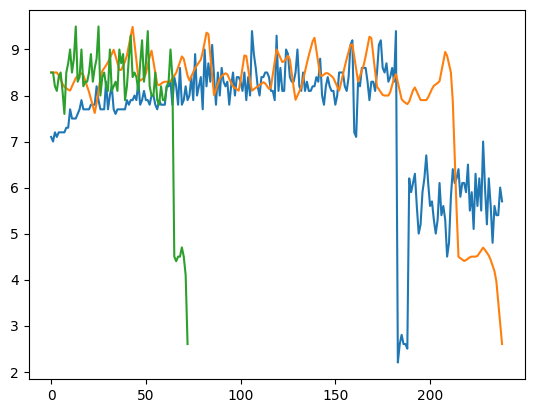

In [114]:
plt.plot(time_series_b)
plt.plot(my_stretched_a)
plt.plot(time_series_a)

In [128]:
from sklearn.metrics import mean_absolute_error

In [135]:
def heatmap_tv_series(tv_1, tv_2):
    print()
    tv_1_array = df.loc[(df['Title']==tv_1)].sort_values(by=['Season', 'Episode']).reset_index(drop=True).Rating.values
    tv_2_array = df.loc[(df['Title']==tv_2)].sort_values(by=['Season', 'Episode']).reset_index(drop=True).Rating.values


    print(tv_1_array.shape, tv_2_array.shape)

    if len(tv_1_array) == len(tv_2_array):
        print("Arrays same length")
        array_1 = tv_1_array
        array_2 = tv_2_array
    else:
        print("Arrays different length")
        if len(tv_1_array) < len(tv_2_array):
            shorter_array = tv_1_array
            longer_array = tv_2_array
        else:
            shorter_array = tv_2_array
            longer_array = tv_1_array

        f = interpolate.interp1d(np.arange(0, len(shorter_array)), shorter_array)
        stretched_array = f(np.linspace(0.0, len(shorter_array)-1, len(longer_array)))

        array_1 = longer_array
        array_2 = stretched_array    

    similarity = spatial.distance.cosine(array_1, array_2)
    
    print("\n", mean_absolute_error(array_1, array_2))

    print(array_1)
    print(array_2)
    
dropdown_list_order = df.Title.sort_values().unique().tolist()

tv_1_widget = widgets.Dropdown(options=df.Title.sort_values().unique().tolist(), value='Wentworth', description='TV Series 1')
tv_2_widget = widgets.Dropdown(options=df.Title.sort_values().unique().tolist(), value='The Wire', description='TV Series 2')

widgets.interact(heatmap_tv_series, tv_1=tv_1_widget, tv_2=tv_2_widget);


interactive(children=(Dropdown(description='TV Series 1', index=231, options=('1883', 'Adventure Time', 'Afric…

In [163]:
l = list(itertools.product(df.Title.unique(), df.Title.unique()))


In [164]:
print(l[:10])

[('Planet Earth II', 'Planet Earth II'), ('Planet Earth II', 'Breaking Bad'), ('Planet Earth II', 'Planet Earth'), ('Planet Earth II', 'Band of Brothers'), ('Planet Earth II', 'Chernobyl'), ('Planet Earth II', 'The Wire'), ('Planet Earth II', 'Blue Planet II'), ('Planet Earth II', 'Avatar: The Last Airbender'), ('Planet Earth II', 'Cosmos: A Spacetime Odyssey'), ('Planet Earth II', 'The Sopranos')]


In [166]:
i

('Planet Earth II', 'Planet Earth II')

In [171]:
data_list = []

for i in l:
    if len(data_list)%1000==0:
        print(len(data_list))
   
    tv_1_array = df.loc[(df['Title']==i[0])].sort_values(by=['Season', 'Episode']).reset_index(drop=True).Rating.values
    tv_2_array = df.loc[(df['Title']==i[1])].sort_values(by=['Season', 'Episode']).reset_index(drop=True).Rating.values
        
    if len(tv_1_array) == len(tv_2_array):
        array_1 = tv_1_array
        array_2 = tv_2_array
    else:
        if len(tv_1_array) < len(tv_2_array):
            shorter_array = tv_1_array
            longer_array = tv_2_array
        else:
            shorter_array = tv_2_array
            longer_array = tv_1_array
    
        f = interpolate.interp1d(np.arange(0, len(shorter_array)), shorter_array)
        stretched_array = f(np.linspace(0.0, len(shorter_array)-1, len(longer_array)))
    
        array_1 = longer_array
        array_2 = stretched_array    
    
    cosine_sim = spatial.distance.cosine(array_1, array_2)
    mae = mean_absolute_error(array_1, array_2)

    data_list.append({"TV Series": i[0],
                     "TV Series 2": i[1],
                     "Cosine": cosine_sim,
                     "MAE": mae})


sim_df = pd.DataFrame(data_list)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000


In [196]:
tv_compare = sim_df.loc[sim_df['MAE'] > 0.00001]
tv_compare.rename(columns={'Movie': 'TV Series',
                          'Movie2': 'TV Series 2'}, inplace=True)

# tv_compare['TV Series 3'] = tv_compare['TV Series 2']
tv_compare

/var/folders/xr/_sn2jn9s3xd13fp9ljzys7tm0000gn/T/ipykernel_15016/535259735.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_compare.rename(columns={'Movie': 'TV Series',


,TV Series,TV Series 2,Cosine,MAE
1,Planet Earth II,Breaking Bad,0.002477,0.545399
2,Planet Earth II,Planet Earth,0.000276,0.209091
3,Planet Earth II,Band of Brothers,0.001109,0.340000
4,Planet Earth II,Chernobyl,0.000503,0.573333
5,Planet Earth II,The Wire,0.001639,0.468418
...,...,...,...,...
59043,I Love Lucy,Garth Marenghi's Darkplace,0.001179,0.394352
59044,I Love Lucy,Erased,0.001286,0.349890
59045,I Love Lucy,Gintama,0.004991,0.687484
59046,I Love Lucy,Queer Eye,0.002708,0.481068


In [197]:
tv_compare.sort_values('MAE')

,TV Series,TV Series 2,Cosine,MAE
3923,The Last Dance,The Beatles: Get Back,0.000048,0.051111
8521,The Beatles: Get Back,The Last Dance,0.000048,0.051111
13986,Pride and Prejudice,Lonesome Dove,0.000025,0.053333
32862,Lonesome Dove,Pride and Prejudice,0.000025,0.053333
5381,Scam 1992: The Harshad Mehta Story,The Beatles: Get Back,0.000057,0.071111
...,...,...,...,...
31372,Mahabharat,Attack on Titan,0.004826,2.902334
31467,Mahabharat,Aspirants,0.005866,3.072455
29289,Aspirants,Mahabharat,0.005866,3.072455
31351,Mahabharat,Chernobyl,0.006063,3.287509


In [198]:
tv_compare.drop_duplicates(['Cosine', 'MAE']).sort_values('MAE').head(20)

,TV Series,TV Series 2,Cosine,MAE
3923,The Last Dance,The Beatles: Get Back,0.000048,0.051111
8521,The Beatles: Get Back,The Last Dance,0.000048,0.051111
13986,Pride and Prejudice,Lonesome Dove,0.000025,0.053333
5381,Scam 1992: The Harshad Mehta Story,The Beatles: Get Back,0.000057,0.071111
8554,The Beatles: Get Back,TVF Pitchers,0.000034,0.080000
4910,The Vietnam War,Apocalypse: The Second World War,0.000056,0.080000
5395,Scam 1992: The Harshad Mehta Story,TVF Pitchers,0.000079,0.092222
32952,Lonesome Dove,Dopesick,0.000075,0.092857
13998,Pride and Prejudice,Dopesick,0.000100,0.098214
13884,Pride and Prejudice,The Civil War,0.000099,0.098611


In [201]:
tv_name = 'Breaking Bad'

tv_compare.loc[tv_compare['TV Series']==tv_name].sort_values('Cosine').head(20)

,TV Series,TV Series 2,Cosine,MAE
451,Breaking Bad,Rurouni Kenshin: Trust and Betrayal,0.001272,0.448599
361,Breaking Bad,The Jinx: The Life and Deaths of Robert Durst,0.001276,0.560682
304,Breaking Bad,Blackadder Goes Forth,0.001294,0.432232
346,Breaking Bad,Panchayat,0.001311,0.461132
259,Breaking Bad,The Last Dance,0.001325,0.417821
439,Breaking Bad,North &amp; South,0.001337,0.741380
302,Breaking Bad,Freaks and Geeks,0.001337,0.420122
278,Breaking Bad,The Beatles: Get Back,0.001377,0.427049
349,Breaking Bad,The Adventures of Sherlock Holmes,0.001388,0.879878
265,Breaking Bad,Scam 1992: The Harshad Mehta Story,0.001402,0.415336


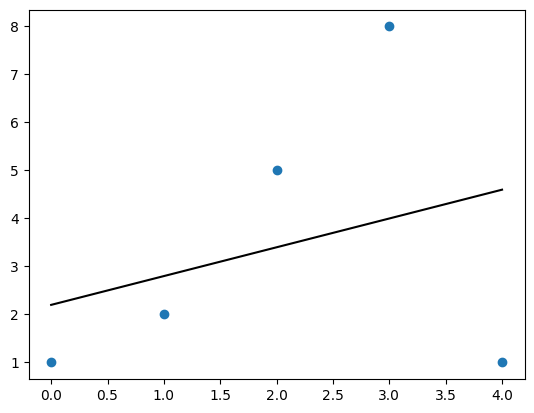

0.6000000000000002


In [202]:


#Example data
x = [0,1,2,3,4]
y = [1,2,5,8,1]

x = np.array(x)
y = np.array(y)




#Fit line
slope, intercept = np.polyfit(x, y, 1)

#Plot
plt.figure()
plt.scatter(x, y) 
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color = 'k')
plt.show()

print(slope)